<a href="https://colab.research.google.com/github/mahin-arvind/Appliance-Energy-Prediction/blob/main/Python_Pushups_Assignment_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON**

## 1. Write a Python program to find whether it contains an additive sequence or not.

## The additive sequence is a sequence of numbers where the sum of the first two numbers is equal to the third one.
## Note: Numbers in the additive sequence cannot have leading zeros.

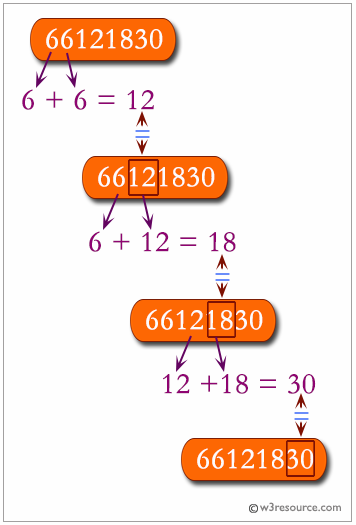

In [1]:
# Write Your Code here.
test_cases = ["66121830", "12321", "1235813","3257"]

def additive_sequence(test):
  #initial conditions
  loc1 = 0                # index of first number
  digits1 = 1             # digits of first number
  loc2 = loc1 + digits1   # index of left most digit of second number
  digits2 = 1             # digits of second number
  

  #initial digits
  a = int(test[loc1: loc2]) #first number
  b = int(test[loc2: loc2 + digits2])  #second number

  while (loc2 + digits2 < len(test)): # checking if the index of the ending of the last number doesnt exceed input length

    result = str(a+b) #sum of two digits
    result_loc = loc1 + digits1 + digits2 # location of the leftmost digit of the next number
    result_digits = len(result) # number of digits of the sum of a and b -> used to extract the right number of digits of the next number 

    #print(test,f"{a}+{b} = {a+b}| actual: {result}") # Print Statement for handling errors

    if (result == test[result_loc: result_loc + result_digits]): # checking if the sum is present in the next digit

      loc1 = loc2 
      digits1 = digits2
      loc2 = loc1 + digits1
      digits2 = result_digits

      a = int(test[loc1: loc2]) 
      b = int(test[loc2: loc2 + digits2]) 
    else:
      return "Not an Additive"
  
  return "Additive"



for test in test_cases: 
  print(test, additive_sequence(test))

66121830 Additive
12321 Not an Additive
1235813 Additive
3257 Additive


## 2. Write a Python program to reverse the bits of an integer (32 bits unsigned).

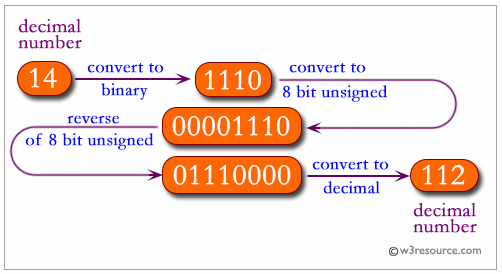

In [2]:
# Write Your Code here.
def binary_generator(test):
  
  val = int(test)
  binary = ""
  reversed = ""
  
  while True:
    binary = str(val % 2) + binary # produces actual binary value
    reversed = reversed + str(val % 2) #produces reverse binary value
    val = val // 2
    if val <1: 
      break
  print(f"Binary value of {test} is {binary} | Reversed Binary:{reversed}")
  return binary

def bin2dec_rev(binary):

  #val = [ (2**(len(binary)-1-index)*int(val))  for index, val in enumerate(binary)] # calculates actual value decimal value

  val = [ (2**(index)*int(val))  for index, val in enumerate(binary)] # calculates binary value in reverse
  return f"Reversed Binary's Decimal value: {sum(val)} \n"

test_cases = ["14", "112", "27", "57","39"] 
for test in test_cases:
  print(bin2dec_rev(binary_generator(test)))

Binary value of 14 is 1110 | Reversed Binary:0111
Reversed Binary's Decimal value: 7 

Binary value of 112 is 1110000 | Reversed Binary:0000111
Reversed Binary's Decimal value: 7 

Binary value of 27 is 11011 | Reversed Binary:11011
Reversed Binary's Decimal value: 27 

Binary value of 57 is 111001 | Reversed Binary:100111
Reversed Binary's Decimal value: 39 

Binary value of 39 is 100111 | Reversed Binary:111001
Reversed Binary's Decimal value: 57 



## 3. Write a Python program to get the Hamming numbers upto a given numbers also check whether a given number is a Hamming number.

## Hamming numbers are numbers of the form
## H = 2i x 3j x 5k
## Where i, j, k ≥ 0
## The sequence of Hamming numbers 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 27. . . consists of all numbers of the form 2i.3j.5k where i, j and k are non-negative integers.

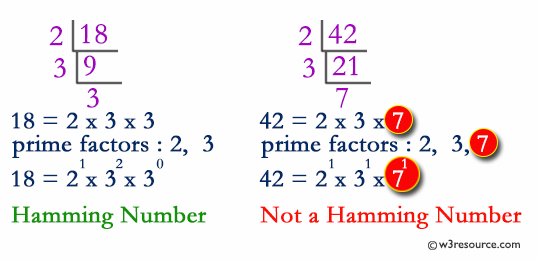

In [3]:
# Write Your Code here.
def hamming_check(test):
  val = int(test)
  factors = [2,3,5]

  for i in factors: 
    while val % i == 0: # Performs step division using 2,3 and 5 if divisible
        val = val //i # value reduction

  if val != 1: # if value is not 1, there is another factor involved
    return "Not Hamming"
  else:
    return "Hamming"

test_cases = ["18", "42", "27", "115", "125"]
for test in test_cases:
  print(test, hamming_check(test))


18 Hamming
42 Not Hamming
27 Hamming
115 Not Hamming
125 Hamming


## 4. Write a Python program to find the smallest positive number that is evenly divisible by all of the numbers from 1 to 30.

## 2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

## Result: 2329089562800.0

All numbers are expressed as product of powers of primes. Therefore, we'll extract primes and powers of primes.

This we'll sift through this list to take the largest power of every prime number. The product of these numbers will result in the smallest possible number that can be divided by each of the numbers from 1 to n.


In [4]:
import math

n = 30

def solution(n):
  numbers = list(range(2,n+1))
  copy = numbers.copy()
  imp = []

  # extracting numbers that are prime and powers of prime
  for pos,i in enumerate(numbers):
    check = True
    for j in numbers[:pos]:
      #algo to extract product of prime by checking if i = j**(natural number). Taking log on both sides and rearranging eqn, we get:
      p = round(math.log10(i)/math.log10(j)) # p is the natural number 
      if i == j**p :
        check == True
        for k in range(1,p+1): # removing all prime factors of larger composite numbers
          if j**k in imp:
            imp.remove(j**k)
        break

      if i%j ==0: 
        check = False
        break
    if check:
      imp.append(i)

  product = 1
  for i in imp:
    product *= i

  print(product)

solution(n)


2329089562800


## 5. Write a Python program to find the closest palindrome number of a given integer. If there are two palindrome numbers in absolute distance return the smaller number.

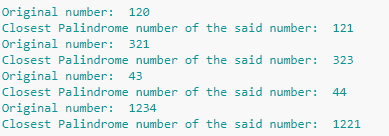

In [5]:
# Write Your Code here.
test_cases = ['1233','154','12666','1','10','100','107', "99","11"]

def palindrome(n):
  """
  Erase '#' in code to find nearest palindrome which is not itself
  """

  l = int(len(n))
  
  if l==1:
      val = int(n) # -1 if int(n) != 0 else 0
      return str(val)

  if l%2 == 0:
      half = n[: int(l/2)]
      val =  int(half + half[::-1])
  else:
      half = n[:int((l+1)/2)]
      val = int(half[:-1] + half[::-1])
  
  # for a 2 digit,possible exceptional palindromes are 9,11 and 99 
  # by generalizing we get int(10**(l-1)/9)*9  | int((10**l)/9) | int(10**(l)/9)*9

  values = [val, int(10**(l-1)/9)*9, int((10**l)/9), int(10**(l)/9)*9, int(10**(l)/9)*9+1] 
  values.sort()
  absolutes = list(map(lambda x: abs(int(n)-x), values))

  loc = absolutes.index(min(absolutes))

  #while values[loc] == int(n):
  #  values.pop(loc)
  #  absolutes.pop(loc)
  #  loc = absolutes.index(min(absolutes))

  return str(values[loc])

        
for n in test_cases:
  print(palindrome(n))

1221
151
12621
1
9
99
111
99
11


CLOSEST PALINDROME INCLUDING ITSELF:  CODE

In [6]:
# Write Your Code here.
test_cases = ['1233','154','12666','1','10','100','107', "99","11"]

def palindrome_exc(n):
  """
  """

  l = int(len(n))
  
  if l==1:
      val = int(n) -1 if int(n) != 0 else 0
      return str(val)

  if l%2 == 0:
      half = n[: int(l/2)]
      val =  int(half + half[::-1])
  else:
      half = n[:int((l+1)/2)]
      val = int(half[:-1] + half[::-1])
  
  # for a 2 digit,possible exceptional palindromes are 9,11 and 99 
  # by generalizing we get int(10**(l-1)/9)*9  | int((10**l)/9) | int(10**(l)/9)*9

  values = [val, int(10**(l-1)/9)*9, int((10**l)/9), int(10**(l)/9)*9, int(10**(l)/9)*9+1] 
  values.sort()
  absolutes = list(map(lambda x: abs(int(n)-x), values))

  loc = absolutes.index(min(absolutes))

  while values[loc] == int(n):
    values.pop(loc)
    absolutes.pop(loc)
    loc = absolutes.index(min(absolutes))

  return str(values[loc])

for n in test_cases:
  print(palindrome_exc(n))

1221
151
12621
0
9
99
111
100
9
